In [1]:
import numpy as np
import pandas as pd
#from pylab import *
import scipy.signal as signal
import scipy as sci
import math as ma

In [2]:
dataset2 = pd.read_json("./../Data/Band/PCL_Jayant/merged_file_acc.json")
dataset2_g = pd.read_json("./../Data/Band/PCL_Jayant/merged_file_gyro.json")
dataset2_h = pd.read_json("./../Data/Band/PCL_Jayant/merged_file_heart.json")
dataset2_t = pd.read_json("./../Data/Band/PCL_Jayant/merged_file_skin.json")
dataset2_s = pd.read_json("./../Data/Band/PCL_Jayant/merged_file_speed.json")

dataset2 = dataset2.sort_values(by='Timestamp') 
dataset2['Timestamp'] = dataset2['Timestamp'].apply(lambda x: x.replace(microsecond=0))
dataset2 = dataset2[[5,6,7,8]]

dataset2_g = dataset2_g.sort_values(by='Timestamp') 
dataset2_g['Timestamp'] = dataset2_g['Timestamp'].apply(lambda x: x.replace(microsecond=0))
dataset2_g = dataset2_g[[1,2,3,8]]

dataset_f2 = dataset2.merge(dataset2_g,how='left', left_on='Timestamp', right_on='Timestamp')

dataset2_h = dataset2_h.sort_values(by='Timestamp') 
dataset2_h['Timestamp'] = dataset2_h['Timestamp'].apply(lambda x: x.replace(microsecond=0))
dataset2_h = dataset2_h[[6,3]]

dataset_f2 = dataset_f2.merge(dataset2_h,how='left', left_on='Timestamp', right_on='Timestamp')

dataset2_t = dataset2_t.sort_values(by='Timestamp') 
dataset2_t['Timestamp'] = dataset2_t['Timestamp'].apply(lambda x: x.replace(microsecond=0))
dataset2_t = dataset2_t[[6,5]]

dataset_f2 = dataset_f2.merge(dataset2_t,how='left', left_on='Timestamp', right_on='Timestamp')

dataset2_s = dataset2_s.sort_values(by='Timestamp')
dataset2_s['Timestamp'] = dataset2_s['Timestamp'].apply(lambda x: x.replace(microsecond=0))
dataset2_s = dataset2_s[[7,5]]
dataset_f2 = dataset_f2.merge(dataset2_s,how='left', left_on='Timestamp', right_on='Timestamp')

dataset_f2 = dataset_f2.fillna(method='bfill')
dataset_f2 = dataset_f2.fillna(method='pad')

dataset_f2

,Timestamp,X,Y,Z,AngularX,AngularY,AngularZ,HeartRate,Temperature,KPH
0,2016-10-26 16:24:54,-0.980713,0.126953,-0.124512,0.457317,-0.457317,-0.091463,70.0,30.950001,1.330978
1,2016-10-26 16:24:55,-0.985596,0.128662,-0.124023,0.457317,-0.457317,-0.091463,70.0,30.950001,1.330978
2,2016-10-26 16:24:56,-0.983398,0.128174,-0.120117,0.365854,-0.396341,0.030488,70.0,30.950001,1.330978
3,2016-10-26 16:24:57,-0.983154,0.125977,-0.120850,0.457317,-0.487805,0.000000,70.0,30.950001,1.330978
4,2016-10-26 16:24:58,-0.981934,0.127930,-0.122559,0.426829,-0.518293,0.121951,70.0,30.950001,1.330978
5,2016-10-26 16:24:59,-0.979248,0.124268,-0.120361,0.487805,-0.365854,0.121951,70.0,30.950001,1.330978
6,2016-10-26 16:25:00,-0.981201,0.127686,-0.123779,0.457317,-0.365854,0.060976,70.0,30.950001,1.330978
7,2016-10-26 16:25:01,-0.980469,0.127930,-0.120605,0.426829,-0.335366,0.121951,70.0,30.950001,1.330978
8,2016-10-26 16:25:02,-0.981201,0.127441,-0.125244,0.487805,-0.365854,0.000000,70.0,30.950001,1.330978
9,2016-10-26 16:25:03,-0.980713,0.128418,-0.127197,0.426829,-0.548781,0.030488,70.0,30.950001,1.330978


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

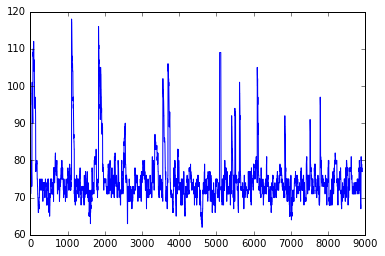

In [4]:
data = dataset_f2.as_matrix();
data = data[1000:9915,:]
plt.plot(data[:,7])

In [5]:
data.shape

(8915, 10)

In [6]:
ax_2 = data[:,1];
ay_2 = data[:,2];
az_2 = data[:,3];
gx_2 = data[:,4];
gy_2 = data[:,5];
gz_2 = data[:,6];
h_2 = data[:,7];
t_2 = data[:,8];
s_2 = data[:,9]

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
#plt.plot(ax_1[0:100])
#plt.show()

In [8]:
d2 = np.mean(data[:,1:4]**2, axis = 1);
d2

array([0.5034028887748718, 0.3319871822992961, 0.3505816062291463, ...,
       0.4514267047246297, 0.2709561387697856, 0.3206585446993509], dtype=object)

In [9]:
d2.shape

(8915,)

In [10]:
rms_acc_2 = []
for i in range (0, len(d2)):
    rms_acc_2.append(ma.sqrt(d2[i]));

In [11]:
#rms_acc_2

In [12]:
w = signal.medfilt(rms_acc_2);

acc_x_2 = signal.medfilt(ax_2);
acc_y_2 = signal.medfilt(ay_2);
acc_z_2 = signal.medfilt(az_2);

Num_taps = 10;
a = signal.firwin(Num_taps, cutoff = 0.001, window = "boxcar");

g_x_2 = signal.convolve(gx_2, a, mode='full');
g_y_2 = signal.convolve(gy_2, a, mode='full');
g_z_2 = signal.convolve(gz_2, a, mode='full');

In [13]:
frame = 50;
stepsize = 25;
vr2 = [];
mn2 = [];
    
vr_acc_x_2 = []
vr_acc_y_2 = []
vr_acc_z_2 = []


rms_acc_x_2 = []
rms_acc_y_2 = []
rms_acc_z_2 = []


# vr1 = variance of rms acc1
# vr2 = variance of rms acc2
# mn1 = mean of rms acc1
# mn2 = mean of rms ac c1

mn_acc_x_2 = []

mn_acc_y_2 = []

mn_acc_z_2 = []

mn_g_x_2 = []

mn_g_y_2 = []

mn_g_z_2 = []

vr_g_x_2 = []

vr_g_y_2 = []

vr_g_z_2 = []

rms_g_x_2 = []

rms_g_y_2 = []

rms_g_z_2 = []

mn_h_2 = []

mn_t_2 = []

mn_s_2 = []


#vr_acc_x_1
#vr_acc_y_1
#vr_acc_z_1

#mn_acc_x_1
#mn_acc_y_1
#mn_acc_z_1


#vr_acc_x_2
#vr_acc_y_2
#vr_acc_z_2

#mn_acc_x_2
#mn_acc_y_2
#mn_acc_z_2    

In [14]:
for cnt in range (0, len(acc_x_2), stepsize):
    dt = acc_x_2[cnt:cnt+frame];
    dt2 = acc_y_2[cnt:cnt+frame];
    dt3 = acc_z_2[cnt:cnt+frame];
    var_acc_x_2 = np.var(dt, axis = 0)
    var_acc_y_2 = np.var(dt2, axis = 0)
    var_acc_z_2 = np.var(dt3, axis = 0)
    
    vr_acc_x_2.append(var_acc_x_2);
    vr_acc_y_2.append(var_acc_y_2);
    vr_acc_z_2.append(var_acc_z_2);
        
    

In [15]:
for cnt in range (0, len(acc_x_2), stepsize):
    dt = acc_x_2[cnt:cnt+frame];
    dt2 = acc_y_2[cnt:cnt+frame];
    dt3 = acc_z_2[cnt:cnt+frame];
    mean_acc_x_2 = np.mean(dt, axis = 0)
    mean_acc_y_2 = np.mean(dt2, axis = 0)
    mean_acc_z_2 = np.mean(dt3, axis = 0)
    
    mn_acc_x_2.append(mean_acc_x_2);
    mn_acc_y_2.append(mean_acc_y_2);
    mn_acc_z_2.append(mean_acc_z_2);
      

In [16]:
for cnt in range (0, len(acc_x_2), stepsize):
    dt = acc_x_2[cnt:cnt+frame];
    dt2 = acc_y_2[cnt:cnt+frame];
    dt3 = acc_z_2[cnt:cnt+frame];
    
    rm_acc_x_2 = np.mean(dt**2, axis = 0)
    rm_acc_y_2 = np.mean(dt2**2, axis = 0)
    rm_acc_z_2 = np.mean(dt3**2, axis = 0)
    
    rms_acc_x_2.append(ma.sqrt(rm_acc_x_2));
    rms_acc_y_2.append(ma.sqrt(rm_acc_y_2));
    rms_acc_z_2.append(ma.sqrt(rm_acc_z_2));
    
   

In [17]:
for count in range (0,len(acc_x_2), stepsize):
    dt2 = w[count:count + frame];
    var2 = np.var(dt2, axis = 0);
    mean2 = np.mean(dt2, axis = 0);
    
    vr2.append(var2);
    mn2.append(mean2);

In [18]:
for cnt in range (0, len(acc_x_2), stepsize):
    dt = gx_2[cnt:cnt+frame];
    dt2 = gy_2[cnt:cnt+frame];
    dt3 = gz_2[cnt:cnt+frame];
    dt4 = h_2[cnt:cnt+frame];
    dt5 = t_2[cnt:cnt+frame];
    dt6 = s_2[cnt:cnt+frame];
    
    mean_gx_2 = np.mean(dt, axis = 0)
    mean_gy_2 = np.mean(dt2, axis = 0)
    mean_gz_2 = np.mean(dt3, axis = 0)
    
    var_gx_2 = np.var(dt, axis = 0)
    var_gy_2 = np.var(dt2, axis = 0)
    var_gz_2 = np.var(dt3, axis = 0)
    
    vr_g_x_2.append(var_gx_2);
    vr_g_y_2.append(var_gy_2);
    vr_g_z_2.append(var_gz_2);
    
    rm_g_x_2 = np.mean(dt**2, axis = 0)
    rm_g_y_2 = np.mean(dt2**2, axis = 0)
    rm_g_z_2 = np.mean(dt3**2, axis = 0)
    
    rms_g_x_2.append(ma.sqrt(rm_g_x_2));
    rms_g_y_2.append(ma.sqrt(rm_g_y_2));
    rms_g_z_2.append(ma.sqrt(rm_g_z_2));
    
    mean_h_2 = np.mean(dt4, axis = 0)
    mean_t_2 = np.mean(dt5, axis = 0)
    mean_s_2 = np.mean(dt6, axis = 0)
    
    mn_g_x_2.append(mean_gx_2);
    mn_g_y_2.append(mean_gy_2);
    mn_g_z_2.append(mean_gz_2);
    mn_h_2.append(mean_h_2);
    mn_t_2.append(mean_t_2);
    mn_s_2.append(mean_s_2);
    

In [19]:
a = np.zeros((len(mn_acc_x_2),), dtype=np.int)
a

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

In [20]:
data_frame_features = np.column_stack((mn_acc_x_2, mn_acc_y_2,mn_acc_z_2,vr_acc_x_2, vr_acc_y_2,vr_acc_z_2,rms_acc_x_2,rms_acc_y_2,rms_acc_z_2,mn2,vr2,mn_g_x_2,mn_g_y_2,mn_g_z_2,vr_g_x_2,vr_g_y_2,vr_g_z_2,rms_g_x_2,rms_g_y_2,rms_g_z_2,mn_h_2,mn_t_2,mn_s_2,a))

In [23]:
data_frame_features = data_frame_features[100:163,:]

In [21]:
data_frame_features.shape

(357, 24)

In [22]:
np.savetxt('lib_jayant.txt',data_frame_features)

In [20]:
#check_f = np.loadtxt('f.txt')

In [21]:
#check_f.shape

(63, 15)